In [57]:
%matplotlib inline 
import numpy as np                       
from matplotlib import pyplot as plt      
import time, sys                   

## Задача Сода

Бесконечная труба заполнена воздухом ($\gamma = 1.4$), в точке $x = 0$ разделена перегородкой. При $t = 0$ слева от перегородки $(\rho, u, p)^T = (1, 0, 1)$, справа - $(\rho, u, p)^T = (0.125, 0, 0.1)$, где $\rho$ - плотность газа, $u$ - его скорость, $p$ - давление. Найти решение в момент времени $t\approx 0.504$. Считать воздух идеальным газом.

Уравнения газовой динамики и численный метод выписаны в книге [1], c.112-117. Там же приводятся графики решения, с которыми надо сверять свое решение.
1. Зализняк В.Е. Основы вычислительной физики. Часть 1. Введение в конечно-разностные методы

### Задание

Часть 1:
1. Реализовать все недостающие функции ***готово***
2. Получить решение с постоянным шагом $\tau = 0.001$ ***готово***
3. Получить решение c $\tau_k = r\tau_{max}$, $\tau_{max}$ зависит от решения на текущем шаге. Постройте график зависимости $\tau_k$ от номера шага. ***готово***
4. Прокомментировать решение, полученное в двух предыдущих пунктах 
    
    **Решение:** все объяснения опираются на приведенный учебник Зализняка.
    Для построение численного решения мы использовали двухшаговую схему Лакса-Вендроффа:
    $$ s_{n+1/2}^{k+1/2} = \dfrac{1}{2}(s_{n+1}^k+s_n^k) - \dfrac{\tau_k}{2h}(f_{n+1}^k - f_n^k)$$
    $$ s^{k+1}_n = s_n^k-\dfrac{\tau_k}{h}(f_{n+1/2}^{k+1/2} - _{n-1/2}^{k+1/2})$$
    Но для исследования схемы на устойчивость придется линеаризовать систему - прицип замороженных коэффициентов - $s = s_0 + w$ ($s_0$ - постоянный вектор), потому что исходная система нелинейная (наши уравнения гидродинамики). Получаем линейную систему с постоянной матрицей:
    $$ \dfrac{\partial w}{\partial t} + \textbf{A}(s_0)\dfrac{\partial w}{\partial x} = 0$$
    Решение задаем в виде $w^k_n = \lambda^k(\alpha) \exp(i\alpha n)w^*$, где $w^*$ некоторый постоянный вектор. Далее получаем задачу на нахождение собственных значений и получаем выражение для собственного значения оператора перехода (все подробнее описано в учебнике): 
    $$\lambda(\alpha) = 1- r^2(1-\cos(\alpha)) \pm ir\sin(\alpha) $$
    т.е. в нашем случае это
    $$ \lambda_j(\alpha) = 1- \left(\dfrac{w_j\tau_k}{h}\right)^2(1-\cos(\alpha)) - i\left(\dfrac{w_j\tau_k}{h}\right)\sin(\alpha), \hspace{0.5cm} j =1, 2, 3  $$
    а $w_j$ - собственные значения $\textbf{A}(s_0)$, т.е. $u_0, u_0 \pm c_0$, $c_0 = (\gamma p_0/ \rho_0)^{1/2}$. Пользуясь критерием фон Неймана получаем, что система устойчива при $r\leq 1 $, т.е. 
    $$ \forall j : \dfrac{\tau_k |w_j|}{h} \leq 1 \Leftrightarrow  \dfrac{\tau_k \max\limits_j |w_j|}{h} = \dfrac{\tau_k( |u_0| + c_0)}{h} \leq 1  $$
    $$\Rightarrow \tau_k \leq \dfrac{h}{\max\limits_n (|u^k_n| + c^k_n)} =  \tau_{max}$$ или в терминах $s$ вектора
    $$ \tau_k \leq \dfrac{h}{\max\limits_n \left(\left|\frac{(s_2)^k_n}{(s_1)^k_n}\right| + \left[\gamma(\gamma-1)\left(\frac{(s_3)^k_n}{(s_1)^k_n} - \dfrac{1}{2}\left(\frac{(s_2)^k_n}{(s_1)^k_n}\right)^2\right)\right]^{1/2}\right)}$$
    Т.к. у нас оценка для линеаризованной системы, то оценка знаменателя иногда может быть заниженной (знаменатель $\max\limits_n(|u^k_n|+c^k_n)$ оценивает наибольшую скорость волны в заданной области в момент времени $t=t_k$), поэтому мы чуть уменьшим наш шаг $\tau_k = r\tau_{max}$ и на практике обычно берут $r=0.9$. Собственно последние две формулы я и реализую в своем коде на вычисление $\tau_k$.
    
    Анализируя графики, полученные при постоянном шаге и при шаге, взятым после анализа устойчивости, видим, что при постоянном шаге наши решения неустойчивые (сильные колебания), а с переменным шагом решения устойчивые и небольшое отклонение происходит только в местах перегиба (где быстро изменяются газодинамические параметры), но такое поведение естественно для схем второго порядка аппроксимации.  
5. Укажите положение ударной волны и контактного разрыва

   **Решение:** После того, как перегородку убирают, у нас влево распространяется волна разрежения, а вправо - контактный разрыв и ударная волна. Ударная волна располагается там, где волна еще не успела дойти, т.е. в этой области еще не замечены волновые возмущения, а именно, газодинамические параметры резко обрываются (примерно $x\approx0.9$). А контактный разрыв может отследить по резкому уменьшению плотности среды $\rho$, т.е. в $x\approx 0.4$
6. Прокомментируйте допустимость предложенного в коде варианта задания граничных условий. Стоит ли его заменить?

    **Решение:** Граничное условие допустимо. Как в примере $6.1$ у нас задача об ударной трубе (задача Сода). В точке $x=0$ разделена перегородкой, и в $t=0$ состояние газа описывется кусочно-постоянной функцией:
    $$ \begin{pmatrix}
  \rho\\
  u \\
  p
\end{pmatrix} = 
\begin{cases}
    (\rho_L \hspace{0.15cm} 0 \hspace{0.15cm}  p_l)^T,& x \leq 0, \\
    (\rho_R \hspace{0.15cm}  0 \hspace{0.15cm}  p_R)^T,& x > 0,
\end{cases} = 
\begin{cases}
    (1\hspace{0.15cm}  0\hspace{0.15cm}  1)^T,& x \leq 0, \\
    (0.125\hspace{0.15cm}  0\hspace{0.15cm}  0.1)^T,& x > 0,
\end{cases}$$

Часть 2: 
1. Реализуйте схему с искусственной вязкостью и проведите расчет в согласии с пунктом 3. **готово**
2. Прокомментируйте решение.
    **Объяснения ниже**

### Схема Лакса-Вендроффа для решения задачи Сода

Примитивные переменные $(\rho, u, p)^T$, консервативные - $(\rho, \rho u, \rho(e + u^2/2))$.

In [58]:
nx = 101  # количество узлов по пространству
h = 2 / (nx-1) # шаг по пространству
x_mesh = np.linspace(-1, 1, nx) #сетка по пространству
gamma = 1.4 # показатель адиабаты

In [59]:
# Пересчет прититивных переменных в консервативные
def primToCons(pv):
    rho = pv[0]
    u = pv[1]
    p = pv[2]
    ekin = 0.5*u**2
    return np.array([rho, rho*u, p/(gamma - 1) + rho*ekin])

# Пересчет консервативныx переменных в примитивные
def consToPrim(s):
    rho = s[0]
    u = s[1]/rho
    p = (gamma -1)*(s[2]-0.5*s[1]**2/s[0])
    return np.array([rho, u, p])

# Вычисление потока f(s)
def flux(s):
    p = consToPrim(s)[2]
    f1 = s[1]
    f2 = s[1]**2/s[0] + p
    f3 = s[1]*(s[2]+p)/s[0]
    return np.array([f1, f2, f3])

# Cхема Лакса-Вендроффа
# snm1, sn, snp1 - узлы шаблона со временного слоя k
def LaxWendroff(snm1, sn, snp1, tau, h):
    sm = (sn + snm1)/2 - 0.5*tau*(flux(sn)-flux(snm1))/h
    sp = (snp1 + sn)/2 - 0.5*tau*(flux(snp1)-flux(sn))/h
    return sn - tau*(flux(sp)-flux(sm))/h

# Вычисление шага по времени
def get_tau(h, sk):
    Max = -1
    for i in range(nx):
        s = sk[i]
        m = np.abs(s[1]/s[0]+ (gamma*(gamma-1)*(s[2]/s[0]-0.5*(s[1]/s[0])**2))**0.5)
        Max = np.maximum(m, Max)
    tmax = h/Max
    r = 0.9
    # число Куранта
    tau_k = r*tmax
    return tau_k

#### Начальное условие

In [60]:
s0 = np.zeros((nx, 3))

pvl = np.array([1,0,1])
pvr = np.array([0.125, 0, 0.1])
s0[:int(nx/2) + 1] = primToCons(pvl)
s0[int(nx/2) + 1:] = primToCons(pvr)

#### Численное решение

In [61]:
skp1 = s0.copy() # решение на слое k+1
sk = s0.copy() # решение на слое k
t = 0
while t < 0.5:  # шагаем по времени
    sk = skp1.copy() # заполняем данными с предыдущего шага
    #tau = get_tau(h, sk) # здесь переменный шаг
    tau = 0.001 # здесь постоянный шаг
    for n in range(1, nx-1): # шагаем по пространству
        skp1[n] = LaxWendroff(sk[n-1], sk[n], sk[n+1], tau, h)
    # левое граничное условие
    skp1[0] = primToCons(pvl)
    # правое граничное условие
    skp1[nx-1] = primToCons(pvr)
    t = t + tau

#### Визуализация решения

Text(0.5, 0.98, 'Solution at time t = 0.5000000000000003')

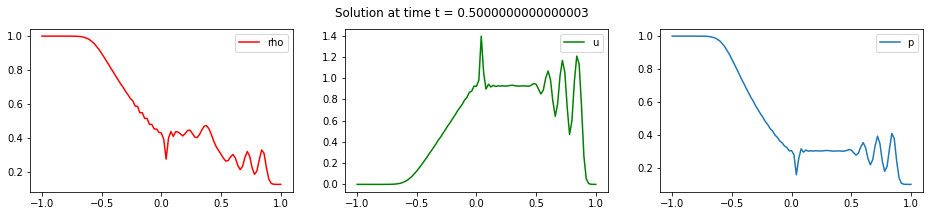

In [62]:
# переводим решение в примитивные переменные
pv_res = np.array([consToPrim(s) for s in skp1])

fig, axs = plt.subplots(1, 3, figsize=(16, 3))
axs[0].plot(x_mesh, pv_res[:, 0], 'r', label='rho')
axs[1].plot(x_mesh, pv_res[:, 1], 'g', label='u')
axs[2].plot(x_mesh, pv_res[:, 2], label='p')
axs[0].legend()
axs[1].legend()
axs[2].legend()
fig.suptitle('Solution at time t = ' + str(t))

In [63]:
skp1 = s0.copy() # решение на слое k+1
sk = s0.copy() # решение на слое k
t = 0
Tau = []
while t < 0.5:  # шагаем по времени
    sk = skp1.copy() # заполняем данными с предыдущего шага
    tau = get_tau(h, sk) # здесь переменный шаг
    Tau.append(tau)
    #tau = 0.001 # здесь постоянный шаг
    for n in range(1, nx-1): # шагаем по пространству
        skp1[n] = LaxWendroff(sk[n-1], sk[n], sk[n+1], tau, h)
    # левое граничное условие
    skp1[0] = primToCons(pvl)
    # правое граничное условие
    skp1[nx-1] = primToCons(pvr)
    t = t + tau

Text(0.5, 0.98, 'Solution at time t = 0.5036750544047095')

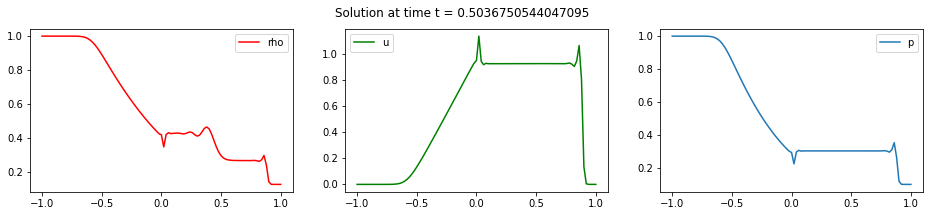

In [64]:
# переводим решение в примитивные переменные
pv_res = np.array([consToPrim(s) for s in skp1])

fig, axs = plt.subplots(1, 3, figsize=(16, 3))
axs[0].plot(x_mesh, pv_res[:, 0], 'r', label='rho')
axs[1].plot(x_mesh, pv_res[:, 1], 'g', label='u')
axs[2].plot(x_mesh, pv_res[:, 2], label='p')
axs[0].legend()
axs[1].legend()
axs[2].legend()
fig.suptitle('Solution at time t = ' + str(t))

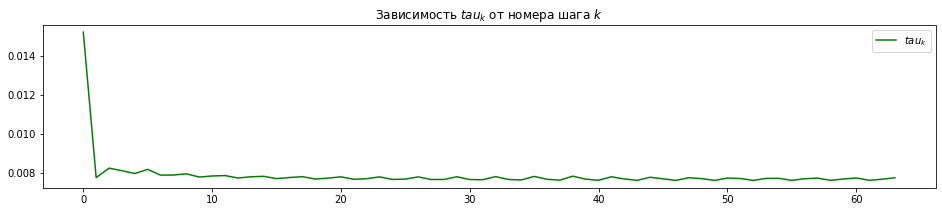

In [65]:
fig = plt.subplots(figsize=(16, 3))
x = np.arange(len(Tau))
plt.plot(x, Tau, 'g', label='$tau_k$')
plt.legend()
plt.title('Зависимость $tau_k$ от номера шага $k$')
plt.show()

 ### Метод исскуственной вязкости

Введение исскуственной вязкости используется для подавления нефизических осцилляций разностного решения. Модифицированная система записывается в виде:
$$ \dfrac{\partial s}{\partial t} + \dfrac{\partial f(s)}{\partial x} = \dfrac{\partial}{\partial x}\left(\mu B(s)\dfrac{\partial s}{\partial x}\right)$$
где $ B(s)$ - квадратная матрица, $\mu$ - коэффициент исскуственной вязкости. Матрица $B(s)$ подбирается специальным образом, чтобы решение $s(x,t)$ обладало достаточной гладкостью и при $mu \rightarrow 0$ приближалось к решению исходной системы.

Мы положим $B(s) = I$ и $\mu = \mu_a(t) h^2$ ($\mu$ взяли из соображений сохранения второго порядка аппроксимации). Тогда вязкостный член имеет вид $\mu_a(t)h^2\dfrac{\partial^2s}{\partial x^2}$. Тогда схема Лакса-Вендроффа принимает вид:
$$s^{k+1}_n = s^k_n - \dfrac{\tau_k}{h}\left(f^{k+1/2}_{n+1/2} - f^{k+1/2}_{n-1/2}\right) + \mu_a^k\tau_k\left(s^k_{n+1} - 2s^k_n + s^k_{n-1}\right), \hspace{0.5cm} n =1, \ldots N-1 $$
где параметр $\nu = \mu_a^k\tau_k$ - постоянный малый параметр, который выбирается экспериментально в зависимости от условий задачи и шага сетки. После исследования на услойчивость получаем, что $$\tau_k \leq \tau_{max}\sqrt{1-2\nu} $$
В нашем случае мы будем брать $\nu = 0.06$ (аналогично примеру из учебника). 

In [66]:
#реализация метода исскуственной вязкости
#немного изменился метод (viscosity), добавляется еще член 
#вязкости в конце в return
def viscosity(snm1, sn, snp1, tau, h, nu):
    sm = (sn + snm1)/2 - 0.5*tau*(flux(sn)-flux(snm1))/h
    sp = (snp1 + sn)/2 - 0.5*tau*(flux(snp1)-flux(sn))/h
    return sn - tau*(flux(sp)-flux(sm))/h + nu*(snp1-2*sn+snm1)

#В вычислении шага поменяли только число Куранта на наш параметр sqrt(1-2nu)
def get_tau2(h, sk):
    Max = -1
    for i in range(nx):
        s = sk[i]
        m = np.abs(s[1]/s[0]+ (gamma*(gamma-1)*(s[2]/s[0]-0.5*(s[1]/s[0])**2))**0.5)
        Max = np.maximum(m, Max)
    tmax = h/Max
    nu = 0.06 #вместо числа куранта 
    tau_k = np.sqrt(1-2*nu)*tmax
    return tau_k

In [67]:
skp1 = s0.copy() # решение на слое k+1
sk = s0.copy() # решение на слое k
t = 0
Tau = []
while t < 0.5:  # шагаем по времени
    sk = skp1.copy() # заполняем данными с предыдущего шага
    tau = get_tau2(h, sk) # здесь переменный шаг
    Tau.append(tau)
    #tau = 0.001 # здесь постоянный шаг
    for n in range(1, nx-1): # шагаем по пространству
        skp1[n] = viscosity(sk[n-1], sk[n], sk[n+1], tau, h, 0.06)
    # левое граничное условие
    skp1[0] = primToCons(pvl)
    # правое граничное условие
    skp1[nx-1] = primToCons(pvr)
    t = t + tau

Text(0.5, 0.98, 'Solution at time t = 0.5012890365234645')

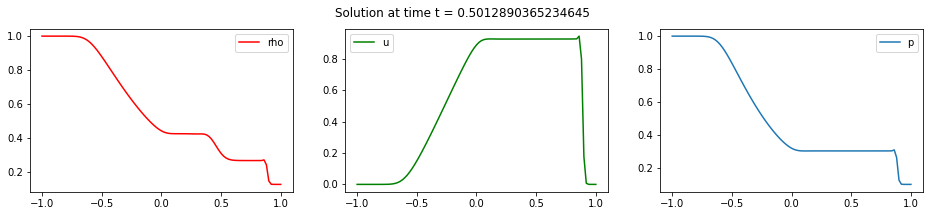

In [68]:
pv_res = np.array([consToPrim(s) for s in skp1])

fig, axs = plt.subplots(1, 3, figsize=(16, 3))
axs[0].plot(x_mesh, pv_res[:, 0], 'r', label='rho')
axs[1].plot(x_mesh, pv_res[:, 1], 'g', label='u')
axs[2].plot(x_mesh, pv_res[:, 2], label='p')
axs[0].legend()
axs[1].legend()
axs[2].legend()
fig.suptitle('Solution at time t = ' + str(t))

Видим, что никаких нефизических отклонений уже нет в местах перегибов (резкого измененния значений газодинамических параметров) уже не наблюдается. Добавляли мы исскуственную вязкость, потому что для исходной системы мы исследовали ее линеаризованный вид, при этом не учитывая все нелинейные члены, которые в ряде случаев являются источником неустойчивости. 

После сравнения с графиками из учебника, понимаем, что наши решения хорошо совпадают с аналитическим, но только в местах разрывов 